---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [72]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
#def plot_graph(G, weight_name=None):
#    '''
#    G: a networkx G
#    weight_name: name of the attribute for plotting edge weights (if G is weighted)
#    '''
#    %matplotlib notebook
#    import matplotlib.pyplot as plt
    
#    plt.figure()
#    pos = nx.spring_layout(G)
#    edges = G.edges()
#    weights = None
    
#    if weight_name:
#        weights = [int(G[u][v][weight_name]) for u,v in edges]
#        labels = nx.get_edge_attributes(G,weight_name)
#        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#        nx.draw_networkx(G, pos, edges=edges, width=weights);
#    else:
#        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [16]:
def answer_one():
    
    # Your Code Here
    
    return nx.read_edgelist('Employee_Movie_Choices.txt', delimiter="\t")
#G = nx.read_edgelist('Employee_Movie_Choices.txt', delimiter="\t")
#len(list(G.edges()))
#list(G.nodes())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [24]:
def answer_two():
    
    G = answer_one()
    for node in G.nodes():
        if node in employees:
            G.add_node(node, type="employee")
        elif node in movies:
            G.add_node(node, type="movie")
    
    return G

answer_two().nodes()
#answer_two().node['Andy']['type']
#answer_two().node['Anaconda']['type']

NodeView(('Andy', 'Anaconda', 'Mean Girls', 'The Matrix', 'Claude', 'Monty Python and the Holy Grail', 'Snakes on a Plane', 'Frida', 'The Shawshank Redemption', 'The Social Network', 'Georgia', 'Joan', 'Forrest Gump', 'Kung Fu Panda', 'Lee', 'Pablo', 'The Dark Knight', 'Vincent', 'The Godfather'))

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


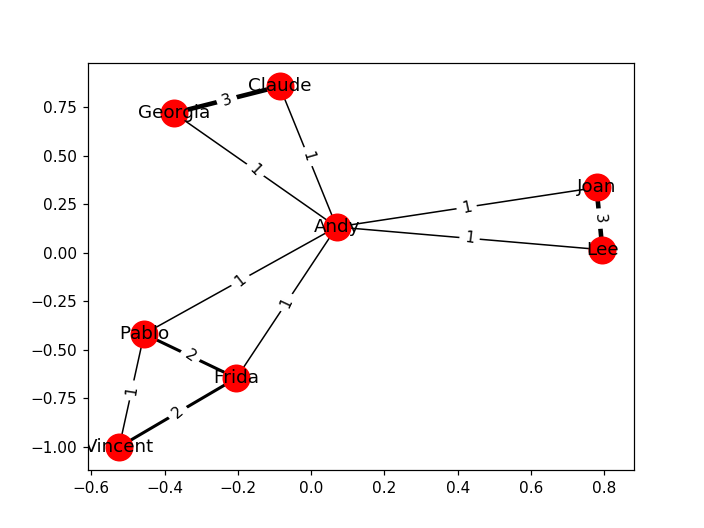

In [68]:
def answer_three():
        
    G = answer_two()
    weighted_projected_graph = bipartite.weighted_projected_graph(G, employees)
    
    return weighted_projected_graph

#%matplotlib notebook
#nx.draw_networkx(answer_three())
#G = answer_three()
#G['Pablo']['Andy']
#plot_graph(G, 'weight')

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [71]:
def answer_four():
    
    G = answer_three()
    R = nx.read_edgelist('Employee_Relationships.txt' ,data=[('relationship_score', int)])
    Gdf = pd.DataFrame(list(G.edges(data=True)), columns=['From', 'To', 'movies_score'])
    Rdf = pd.DataFrame(list(R.edges(data=True)), columns=['From', 'To', 'relationship_score'])

    Gdf_copy = Gdf.copy()
    Gdf_copy.rename(columns={"From":"To", "To":"From"}, inplace=True)

    Gdf2 = pd.concat([Gdf, Gdf_copy])
    Gdf2

    df = pd.merge(Gdf2, Rdf, on = ['From', 'To'], how='right')
    df['movies_score'] = df['movies_score'].map(lambda x: {'weight': 0} if x is np.nan else x)

    df['movies_score'] = df['movies_score'].map(lambda x: x['weight'])
    df['relationship_score'] = df['relationship_score'].map(lambda x: x['relationship_score'])

    return df['movies_score'].corr(df['relationship_score'])

answer_four()

C:\Users\lolen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


0.7883962221733473